In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns


In [2]:
df = pd.read_csv('/Users/youziya/Downloads/Customer_Data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Data preprocessing
1. missing values
Check if there's any missing value. Minimum payments has 313 missing values and credit limit has 1, we filled it with the median value of minimum payments
--we used median as median is less sensitive to dataset than mean.

2. Feature Scaling
(Before we process feature scaling, we dropped the cust_id column as it's not useful for our clustering)

3. PCA analysis 
It appears that the first 6-7 principal components explain a significant portion of the variance in the data.
--impact: Using fewer components can make the clustering process more efficient and easier to visualize.
Each feature contributes equally to the distance metric after scaling data.
PCA can filter out noise data and make clusters more precise.


In [5]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

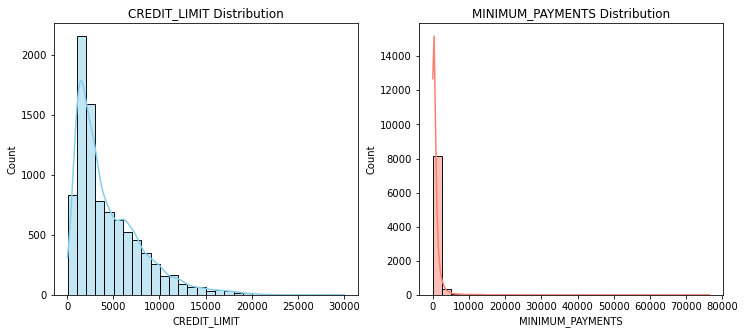

In [6]:
# Plotting the distribution of CREDIT_LIMIT and MINIMUM_PAYMENTS
plt.figure(figsize=(12, 5))

# Plot for CREDIT_LIMIT
plt.subplot(1, 2, 1)
sns.histplot(df['CREDIT_LIMIT'], bins=30, kde=True, color='skyblue')
plt.title('CREDIT_LIMIT Distribution')

# Plot for MINIMUM_PAYMENTS
plt.subplot(1, 2, 2)
sns.histplot(df['MINIMUM_PAYMENTS'].dropna(), bins=30, kde=True, color='salmon')
plt.title('MINIMUM_PAYMENTS Distribution')

plt.show()


In [7]:
# These two graphs are all right skewed, it's better to use mediam because mediam is less sensitive to outliers than mean.Filling missing values with median
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)


In [8]:
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())

In [9]:
df.dropna(inplace=True)

In [10]:
df.drop(['CUST_ID'], axis=1, inplace=True)

In [11]:
print(df['TENURE'].unique())

[12  8 11  9 10  7  6]


In [12]:
df.groupby('TENURE').count()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
TENURE,,,,,,,,,,,,,,,,
6,204,204,204,204,204,204,204,204,204,204,204,204,204,204,204,204
7,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190
8,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196
9,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175
10,236,236,236,236,236,236,236,236,236,236,236,236,236,236,236,236
11,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365
12,7584,7584,7584,7584,7584,7584,7584,7584,7584,7584,7584,7584,7584,7584,7584,7584


In [13]:
#Feature scaling
scaler = StandardScaler()
df_std = scaler.fit_transform(df)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [14]:
#PCA analysis
pca = PCA()
df_pca = pca.fit_transform(df_std)

# The transformed data is an array, convert it back into a dataframe
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(len(df.columns))])

# Print the explained variance ratio
print('Explained variance ratio:', pca.explained_variance_ratio_)

# Print the cumulative explained variance ratio
cumsum_variance = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative explained variance ratio:', cumsum_variance)

# Show the first few rows of transformed dataframe
df_pca.head()

Explained variance ratio: [2.72976713e-01 2.03137796e-01 8.81318170e-02 7.47952439e-02
 6.22472925e-02 5.74005645e-02 4.88342555e-02 4.29920325e-02
 3.79825870e-02 3.08000227e-02 2.37225104e-02 1.77336964e-02
 1.42785685e-02 1.21691956e-02 1.01266703e-02 2.67034839e-03
 6.85226796e-07]
Cumulative explained variance ratio: [0.27297671 0.47611451 0.56424633 0.63904157 0.70128886 0.75868943
 0.80752368 0.85051572 0.8884983  0.91929833 0.94302084 0.96075453
 0.9750331  0.9872023  0.99732897 0.99999931 1.        ]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,-1.683649,-1.072241,0.475660,0.679928,0.043195,0.068069,0.822155,-0.018952,0.118336,-0.078196,-0.235948,-0.052497,-0.081637,-0.187992,0.149962,0.048266,-0.000161
1,-1.134085,2.509150,0.602216,-0.109542,0.662638,-1.102255,-0.384282,0.176154,0.674472,-0.777929,-0.870746,-0.607171,-0.034550,-0.733098,-0.532951,-0.082909,0.000003
2,0.969395,-0.383577,0.090970,1.238359,-2.166584,-0.320185,-1.542496,-0.229364,-0.867803,-0.001744,-0.762170,0.683870,0.696544,0.042389,0.221683,0.511325,0.000022
3,-0.888220,0.004648,1.499800,1.075271,0.225828,-0.171540,-0.236644,-0.690410,-0.064245,0.393690,0.747670,0.119186,-0.127887,-0.417356,-0.091930,-0.016174,-0.000010
4,-1.600021,-0.683795,0.347927,1.013642,-0.453816,0.077004,0.698278,0.245311,0.578032,-0.122073,-0.455167,-0.108719,-0.037507,-0.040989,0.290908,-0.070603,-0.000081


In [15]:
# let's reduce to 6 components as 6 compoents capture 76% variance
# Perform PCA
pca = PCA(n_components = 6)
df_pca = pca.fit_transform(df_std)

# The transformed data is an array, convert it back into a dataframe
df_pca = pd.DataFrame(df_pca)

# Print the explained variance ratio
print('Explained variance ratio:', pca.explained_variance_ratio_)

# Print the cumulative explained variance ratio
cumsum_variance = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative explained variance ratio:', cumsum_variance)

# Show the first few rows of transformed dataframe
df_pca.head()

Explained variance ratio: [0.27297671 0.2031378  0.08813182 0.07479524 0.06224729 0.05740056]
Cumulative explained variance ratio: [0.27297671 0.47611451 0.56424633 0.63904157 0.70128886 0.75868943]


,0,1,2,3,4,5
0,-1.683649,-1.072241,0.475660,0.679928,0.043195,0.068069
1,-1.134085,2.509150,0.602216,-0.109542,0.662638,-1.102255
2,0.969395,-0.383577,0.090970,1.238359,-2.166584,-0.320185
3,-0.888220,0.004648,1.499800,1.075271,0.225828,-0.171540
4,-1.600021,-0.683795,0.347927,1.013642,-0.453816,0.077004


### EDA analysis


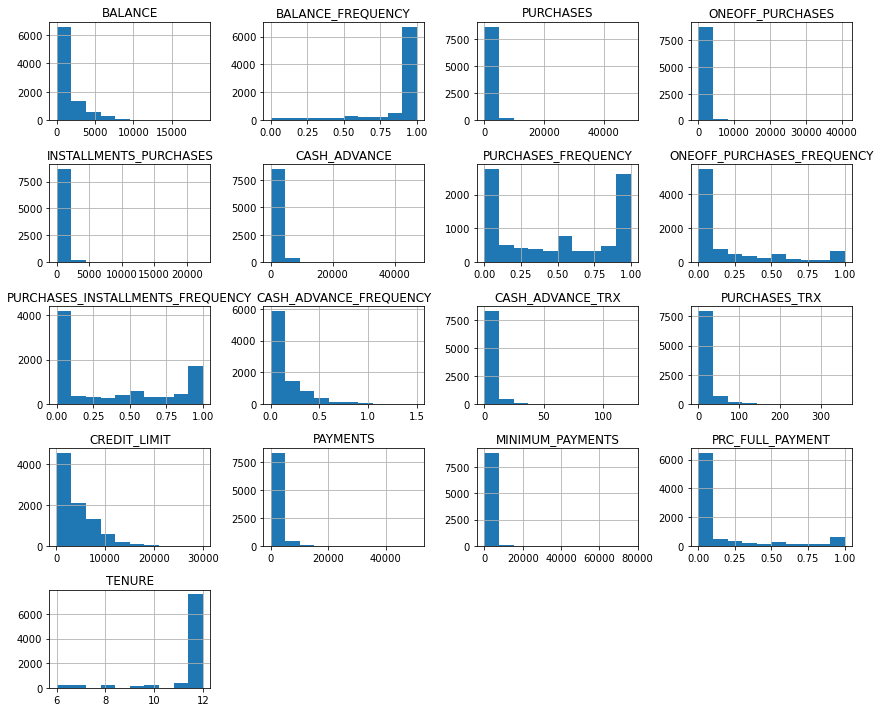

In [16]:
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

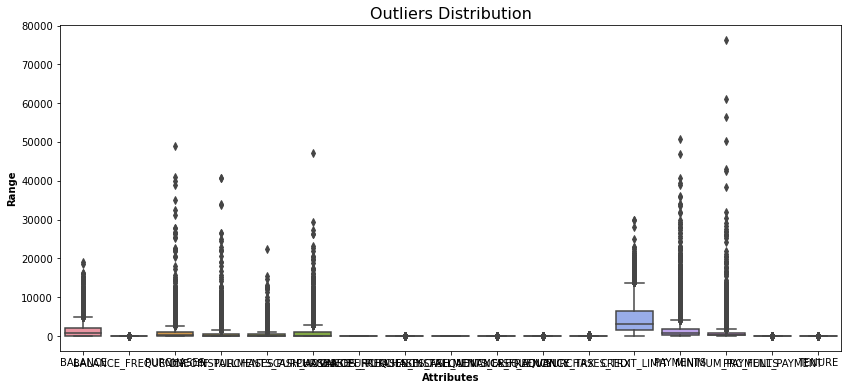

In [18]:
def show_boxplot(df):
    plt.rcParams['figure.figsize'] = [14, 6]
    sns.boxplot(data = df, orient="v")
    plt.title("Outliers Distribution", fontsize = 16)
    plt.ylabel("Range", fontweight = 'bold')
    plt.xlabel("Attributes", fontweight = 'bold')

show_boxplot(df)

In [21]:
def remove_outliers(df):
    df = df.copy()
   
for col in list(df.columns):
 
      Q1 = df[str(col)].quantile(0.05)
      Q3 = df[str(col)].quantile(0.95)
      IQR = Q3 - Q1
      lower_bound = Q1 - 1.5*IQR
      upper_bound = Q3 + 1.5*IQR
 
      df = df[(df[str(col)] >= lower_bound) & 

        (df[str(col)] <= upper_bound)]
result = df   
print(result)


          BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.9

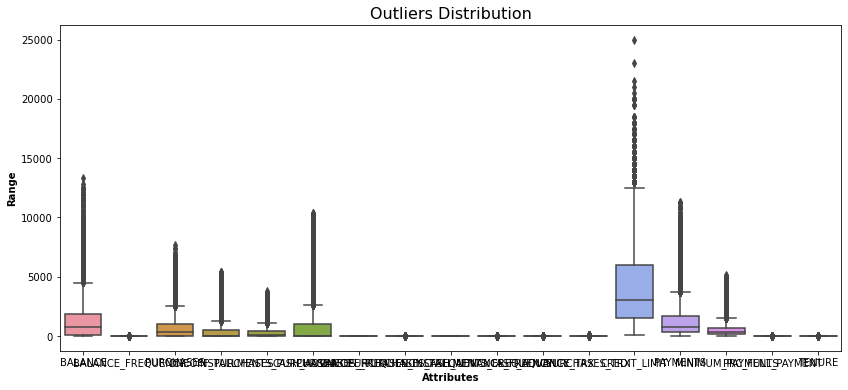

In [22]:
show_boxplot(df)

In [23]:
df.shape

(8427, 17)

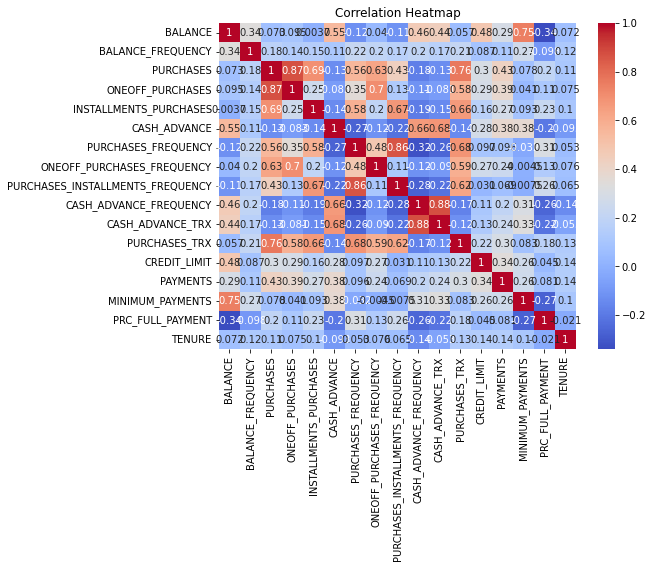

In [24]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [25]:
descriptive_stats = df.describe()
print(descriptive_stats)

            BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count   8427.000000        8427.000000  8427.000000       8427.000000   
mean    1409.863233           0.872607   767.501983        436.272170   
std     1845.384404           0.240590  1084.059144        808.838383   
min        0.000000           0.000000     0.000000          0.000000   
25%      111.759547           0.857143    37.165000          0.000000   
50%      793.213204           1.000000   343.750000         27.790000   
75%     1872.930146           1.000000  1020.500000        518.415000   
max    13318.659120           1.000000  7680.080000       5439.960000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8427.000000   8427.000000          8427.000000   
mean               331.466870    832.804454             0.482007   
std                545.275563   1549.417546             0.398878   
min                  0.000000      0.000000             0.000000   
25

In [ ]:
sns.scatterplot(data = df, x = 'longitude', y = 'latitude', hue = 'TEUNRE')

### Clustering

In [26]:
grouped_data = df.groupby('TENURE')
average_curves = grouped_data.agg('mean')
average_curves.shape

(7, 16)

In [27]:
average_curves

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
TENURE,,,,,,,,,,,,,,,,
6,998.804770,0.789782,409.857085,251.720000,158.287839,1285.642302,0.466499,0.142379,0.303183,0.226968,3.527638,5.452261,2856.381910,503.352991,286.591954,0.215327
7,928.807204,0.801075,398.597688,227.787419,170.810269,1112.346220,0.430876,0.122888,0.291859,0.212750,3.559140,5.688172,2410.483871,599.439689,357.383671,0.134780
8,979.752969,0.777632,441.303316,274.025421,167.277895,1249.925619,0.407895,0.136184,0.280921,0.174342,3.226316,6.305263,2804.473684,739.777785,390.333519,0.156767
9,1043.529349,0.779093,538.353018,303.335740,236.614911,1401.116514,0.411571,0.111111,0.299803,0.195266,3.585799,6.544379,2952.268245,965.415046,412.709672,0.172847
10,1195.270301,0.789565,550.931739,339.918087,211.218000,1194.283442,0.386957,0.136957,0.258261,0.174348,3.660870,7.508696,3626.086957,933.856112,439.367560,0.168489
11,1491.040157,0.865380,477.559676,298.924749,178.634926,1067.574017,0.357200,0.139179,0.232502,0.152588,3.436578,6.746313,3944.985251,1248.932154,599.105041,0.119613
12,1457.198886,0.884581,822.125690,464.037057,358.320666,765.312985,0.496451,0.202921,0.371498,0.117983,2.657436,13.478212,4445.814563,1443.243246,618.108972,0.150831


<AxesSubplot:xlabel='TENURE'>

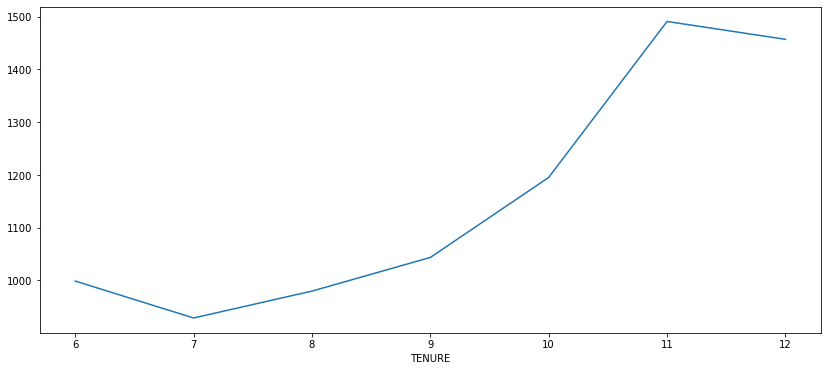

In [31]:
average_curves['BALANCE'].plot()

In [32]:
avg_curves_norm = average_curves/average_curves.mean()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(home_data[['latitude', 'longitude']], home_data[['median_house_value']], test_size=0.33, random_state=0)

In [33]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

NameError: name 'X_train' is not defined

In [34]:
avg_curves_norm

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
TENURE,,,,,,,,,,,,,,,,
6,0.863761,0.972107,0.788462,0.815854,0.748070,1.114323,1.104159,1.005074,1.041340,1.266720,1.043955,0.737885,0.867806,0.547632,0.646392,1.347412
7,0.803228,0.986007,0.766802,0.738286,0.807251,0.964120,1.019842,0.867485,1.002446,1.187365,1.053277,0.769812,0.732336,0.652171,0.806059,0.843388
8,0.847285,0.957151,0.848957,0.888149,0.790557,1.083366,0.965448,0.961347,0.964879,0.973011,0.954782,0.853326,0.852035,0.804854,0.880376,0.980973
9,0.902439,0.958950,1.035656,0.983147,1.118245,1.214410,0.974150,0.784351,1.029732,1.089790,1.061166,0.885687,0.896937,1.050340,0.930844,1.081593
10,1.033664,0.971840,1.059854,1.101715,0.998219,1.035138,0.915889,0.966798,0.887048,0.973043,1.083382,1.016193,1.101652,1.016005,0.990969,1.054322
11,1.289444,1.065156,0.918705,0.968850,0.844231,0.925314,0.845459,0.982490,0.798574,0.851599,1.017007,0.913016,1.198538,1.358797,1.351248,0.748483
12,1.260178,1.088790,1.581564,1.503999,1.693427,0.663331,1.175052,1.432455,1.275981,0.658470,0.786431,1.824081,1.350696,1.570201,1.394111,0.943829


In [35]:
X = avg_curves_norm.copy()
X = np.array(X.T)

In [36]:
X

array([[0.8637614 , 0.80322785, 0.84728549, 0.90243899, 1.03366381,
        1.28944411, 1.26017835],
       [0.97210667, 0.98600692, 0.95715106, 0.95894957, 0.97183963,
        1.06515596, 1.08879019],
       [0.78846219, 0.76680193, 0.84895684, 1.03565612, 1.05985442,
        0.91870498, 1.58156353],
       [0.81585426, 0.73828594, 0.88814877, 0.98314697, 1.10171469,
        0.96885043, 1.50399893],
       [0.7480701 , 0.80725124, 0.7905572 , 1.11824471, 0.99821863,
        0.84423066, 1.69342747],
       [1.11432294, 0.96411957, 1.08336571, 1.21440953, 1.03513818,
        0.92531353, 0.66333055],
       [1.10415927, 1.01984174, 0.96544821, 0.97415036, 0.91588944,
        0.84545934, 1.17505166],
       [1.00507351, 0.86748525, 0.9613465 , 0.78435113, 0.96679837,
        0.98248977, 1.43245547],
       [1.04134012, 1.00244627, 0.96487868, 1.02973175, 0.88704782,
        0.79857394, 1.27598143],
       [1.26672039, 1.18736507, 0.9730115 , 1.0897899 , 0.97304343,
        0.85159938, 0.6

In [37]:
del silhouette_score

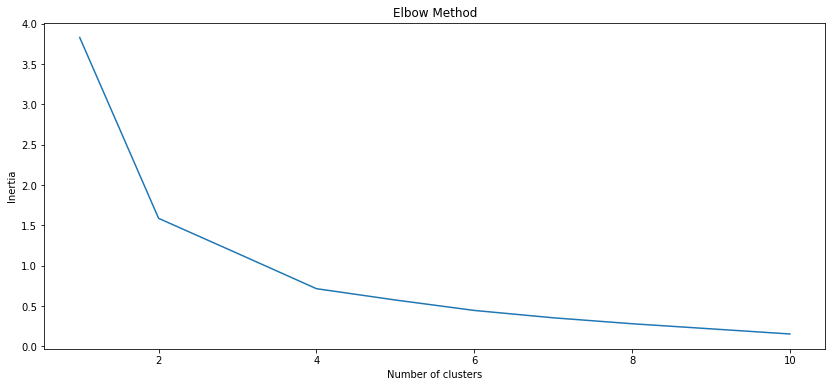

In [38]:
# Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [39]:
# Applying K-means with 4 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_


In [44]:
from sklearn.metrics import silhouette_score

Silhouette Score: 0.390649948286912


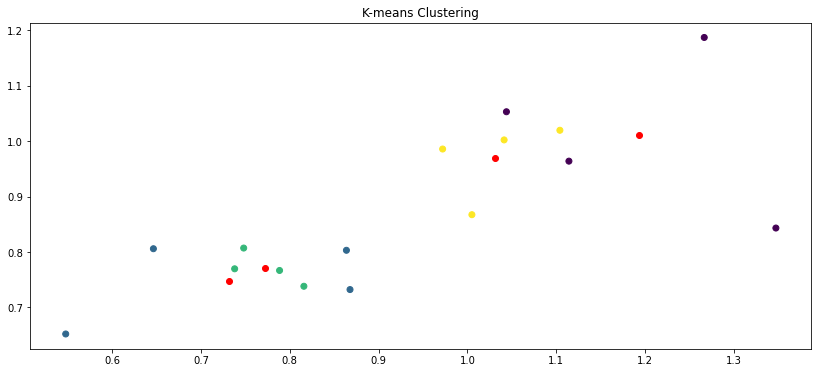

In [45]:
# Silhouette Score
sil_score = silhouette_score(X, labels)
print(f"Silhouette Score: {sil_score}")

# Plotting the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], c='red')
plt.title('K-means Clustering')
plt.show()


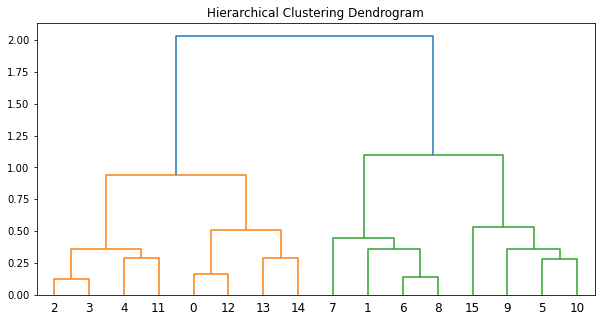

In [42]:
# Importing required libraries
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate linkage matrix
Z = linkage(X, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

Affinity Propagation Silhouette Score: 0.3604116219410921


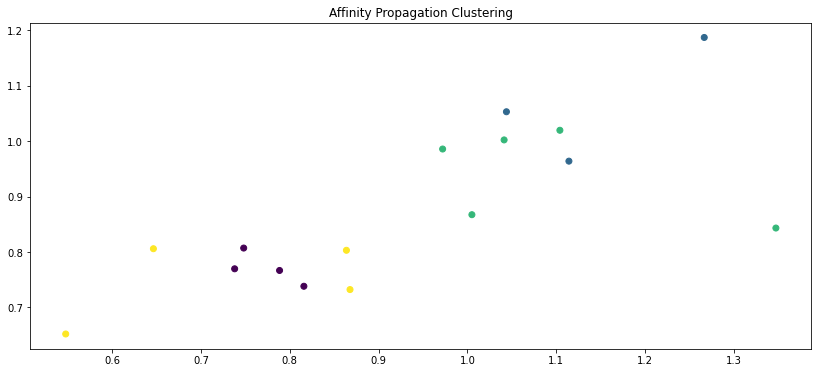

In [46]:
# Importing required library
from sklearn.cluster import AffinityPropagation

# Applying Affinity Propagation
af = AffinityPropagation(random_state=0)
af_labels = af.fit_predict(X)

# Silhouette Score
af_sil_score = silhouette_score(X, af_labels)
print(f"Affinity Propagation Silhouette Score: {af_sil_score}")

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=af_labels)
plt.title('Affinity Propagation Clustering')
plt.show()


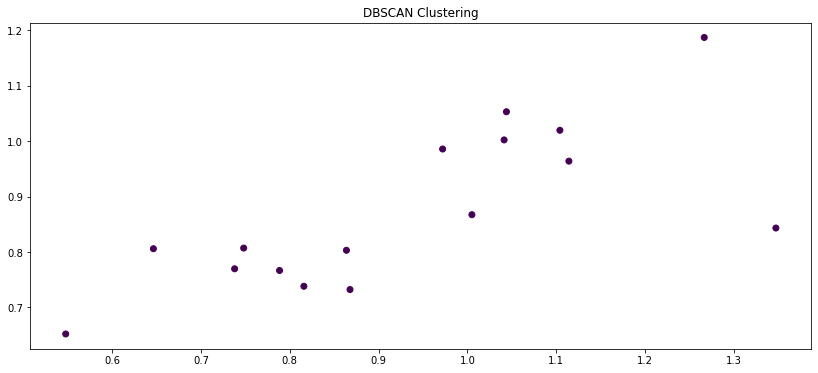

In [47]:
# Importing required library
from sklearn.cluster import DBSCAN

# Applying DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Silhouette Score
# Note: DBSCAN can result in noise data point with label -1
# Only include points that are part of a cluster
if len(set(dbscan_labels)) > 1:
    dbscan_sil_score = silhouette_score(X, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {dbscan_sil_score}")

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels)
plt.title('DBSCAN Clustering')
plt.show()
